## IMPORT PACKAGES AND LOAD DATA

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
mod1 = pd.read_csv("mod1_encoded_sem1.csv")
mod1.shape

(1241, 16)

In [23]:
mod1.head()

,LEARNING STYLE,PROGRAM,YEAR,RACE,GENDER,RELIGION,STATE,REGION,INCOME,DEPENDENTS,SCHOOL,SPM ADDMATH,SPM PHY,SPM CHEM,SPM BIO,SEM1 CGPA
0,0,1,1,3,0,2,1,1,6,6,1,6,5,5,3,1
1,0,1,2,3,0,2,1,0,1,6,1,5,4,6,5,1
2,0,1,1,3,0,2,1,1,7,2,1,7,2,4,5,1
3,0,1,2,3,0,2,8,2,2,6,1,5,3,6,4,2
4,0,1,2,3,0,2,1,2,3,4,1,3,4,6,5,1


## TRAIN TEST SPLIT

In [57]:
## CREATE TRAIN TEST SPLIT TO AVOID OVERFITTING
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(mod1.drop(labels=['SEM1 CGPA'],axis=1),
                                                 mod1['SEM1 CGPA'],test_size=0.2,random_state=0)

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 552 to 684
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  992 non-null    int64
 1   PROGRAM         992 non-null    int64
 2   YEAR            992 non-null    int64
 3   RACE            992 non-null    int64
 4   GENDER          992 non-null    int64
 5   RELIGION        992 non-null    int64
 6   STATE           992 non-null    int64
 7   REGION          992 non-null    int64
 8   INCOME          992 non-null    int64
 9   DEPENDENTS      992 non-null    int64
 10  SCHOOL          992 non-null    int64
 11  SPM ADDMATH     992 non-null    int64
 12  SPM PHY         992 non-null    int64
 13  SPM CHEM        992 non-null    int64
 14  SPM BIO         992 non-null    int64
dtypes: int64(15)
memory usage: 124.0 KB


In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 1031 to 963
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  249 non-null    int64
 1   PROGRAM         249 non-null    int64
 2   YEAR            249 non-null    int64
 3   RACE            249 non-null    int64
 4   GENDER          249 non-null    int64
 5   RELIGION        249 non-null    int64
 6   STATE           249 non-null    int64
 7   REGION          249 non-null    int64
 8   INCOME          249 non-null    int64
 9   DEPENDENTS      249 non-null    int64
 10  SCHOOL          249 non-null    int64
 11  SPM ADDMATH     249 non-null    int64
 12  SPM PHY         249 non-null    int64
 13  SPM CHEM        249 non-null    int64
 14  SPM BIO         249 non-null    int64
dtypes: int64(15)
memory usage: 31.1 KB


In [60]:
#distribution in training set
y_train.value_counts(normalize=True)

0    0.459677
1    0.372984
2    0.145161
3    0.021169
4    0.001008
Name: SEM1 CGPA, dtype: float64

In [61]:
#distribution in testing set
y_test.value_counts(normalize=True)

0    0.493976
1    0.313253
2    0.172691
3    0.020080
Name: SEM1 CGPA, dtype: float64

In [62]:
#shape of training set
X_train.shape, y_train.shape

((992, 15), (992,))

In [63]:
#shape of testing set
X_test.shape, y_test.shape

((249, 15), (249,))

## DECISION TREE MODELLING

In [163]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [177]:
dt_mod =  DecisionTreeClassifier (random_state=0, criterion = 'entropy')
dt_mod.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [178]:
dt_mod.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [179]:
#checking the training score
dt_mod.score(X_train, y_train)

0.998991935483871

In [180]:
#checking the testing score
dt_mod.score(X_test, y_test)

0.4779116465863454

In [168]:
#Predicting values on test set
y_predicted = dt_mod.predict(X_test)
y_predicted

array([0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 3,
       1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0,
       0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1, 0, 1, 1, 3,
       1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0,
       1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 0, 0,
       1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 1], dtype=int64)

In [169]:
#Predicting values on test set - alternative
dt_mod.predict_proba(X_test)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [170]:
#Checking test accuracy
accuracy_score(y_test, y_predicted) * 100

46.98795180722892

In [171]:
#Confusion Matrix
confusion_matrix(y_test, y_predicted)

array([[67, 46,  9,  1],
       [30, 39,  6,  3],
       [15, 18, 10,  0],
       [ 0,  2,  2,  1]], dtype=int64)

## PLOTTING THE TREE

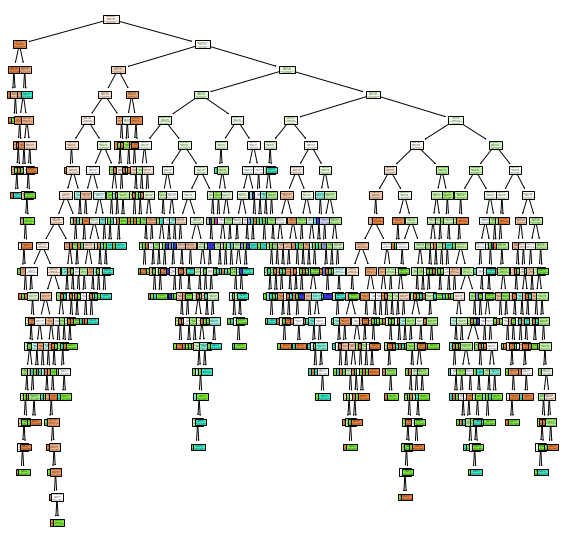

In [175]:
#Plotting the Tree
from sklearn import tree
fn = ["learning style",
      "program",
      "year",
      "race",
      "gender",
      "religion",
      "state",
      "region",
      "income",
      "dependents",
      "school",
      "SPM addmath",
      "SPM phy",
      "SPM chem",
      "SPM bio"]
cn = ["<=1.99","<=2.49","<=2.99", "<=3.49","=>3.50"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=70)
tree.plot_tree(dt_mod, filled = True, feature_names = fn, class_names = cn);
fig.savefig('imagename.png')